In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('crime.csv')
print(df.info())
print(df.head(),end="\n\n")
print(df.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33116 entries, 0 to 33115
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       33116 non-null  object 
 1   Latitude   33116 non-null  float64
 2   Longitude  33116 non-null  float64
 3   Magnitude  33116 non-null  object 
dtypes: float64(2), object(2)
memory usage: 1.0+ MB
None
                       Date   Latitude  Longitude Magnitude
0  2017-02-06T20:11:14.000Z  38.894376 -76.997556         4
1  2017-06-03T12:54:27.000Z  38.906838 -77.058661         6
2  2017-04-07T00:00:00.000Z  38.960739 -77.018034        16
3  2017-05-31T11:39:56.000Z  38.905151 -77.063998         4
4  2017-07-30T00:00:00.000Z  38.949532 -77.020246        16

                           Date   Latitude  Longitude Magnitude
33111  2017-12-23T17:15:25.000Z  38.918640 -77.031953         4
33112  2017-12-30T06:13:28.000Z  38.927417 -77.021727         6
33113  2017-12-30T16:07:46.000Z  38.919739

In [3]:
df.drop(labels=['Date','Magnitude'],axis=1,inplace=True)
df=df.iloc[:1000,:]
df

,Latitude,Longitude
0,38.894376,-76.997556
1,38.906838,-77.058661
2,38.960739,-77.018034
3,38.905151,-77.063998
4,38.949532,-77.020246
...,...,...
995,38.904060,-76.998455
996,38.822840,-77.003927
997,38.899121,-77.021926
998,38.909650,-77.033263


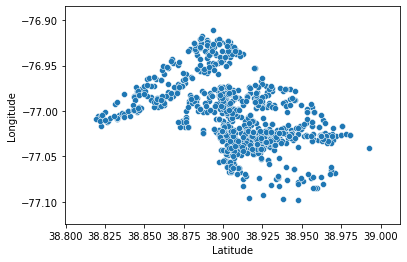

In [4]:
sns.scatterplot(x='Latitude',y='Longitude',data=df)

In [5]:
print(df.describe())
df=np.array(df)

          Latitude    Longitude
count  1000.000000  1000.000000
mean     38.906723   -77.006467
std       0.029956     0.034989
min      38.819381   -77.098182
25%      38.894860   -77.029652
50%      38.905651   -77.010912
75%      38.924196   -76.984896
max      38.992937   -76.910930


In [6]:
from random import uniform
from random import seed
import math

seed(5)

def randomCentroid(df,k):
    centroid=[]
    while(len(centroid)<k):
        r=[]
        for i in range(df.shape[1]):
            r.append(uniform(np.min(df[:,i]),np.max(df[:,i])))
        if r not in centroid:
            centroid.append(r)
    return centroid


def FindDistance(r1,r2):
    return np.sum((r1-r2)**2)


def group_data(df,k,centroid):
    groups={i:list() for i in np.arange(k)}
    for r in range(df.shape[0]):
        label=None
        min_dis=None
        for c in range(len(centroid)):
            cen = np.array(centroid[c])
            dis = FindDistance(df[r,:],cen)
            if min_dis is None or min_dis>dis:
                min_dis=dis
                label=c
        groups[label].append(df[r,:])
    return groups


def KMeans(df,k):
    cen=randomCentroid(df,k) #centroids
    grps=group_data(df,k,cen)   
    ncen=[] #new centroids
    
    for key in grps.keys():
        arr = np.array(grps[key])
        if arr.size!=0:
            ls = list(np.mean(arr,axis=0))
            ncen.append(ls) 
            
    while ncen!=cen:
        cen=ncen
        ncen=list()
        grps=group_data(df,k,cen)
        for key in grps.keys():
            arr = np.array(grps[key])
            if arr.size!=0:
                ls = list(np.mean(arr,axis=0))
                ncen.append(ls)
    return grps,cen

def CalWCSS(group,centroid):
    wcss=0
    for key in range(len(centroid)):
        r1=np.array(centroid[key])
        val=0
        for i in range(len(group[key])):
            r2=np.array(group[key][i])
            wcss+= FindDistance(r1,r2)
    return wcss

def plotWCSS(wcss):
    plt.plot(wcss)
    plt.xlabel('value of k')
    plt.ylabel('within cluster sum of squares')


2.1194529865106215
2.1194529865106215
0.7698744966755305
0.5606972795075612
0.52451209931383
0.5141517130669915
0.32724140212351205
0.2805327422317545
0.3326648157618914
0.2805338126113053
0.2092953788006471
0.1984683023894019
0.2213778420555948
0.13801666039303181
0.13381475600881346
0.14667835472498625
0.1289325669520843
0.1079407298011261
0.11634285833627536
0.12378396569057142
0.12118946414107848
0.13794428299684747
0.11071402961960028
0.12750113077883235
0.11977163174580059
0.09579057257115622
0.08980411190158757
0.11094154067516035
0.09493163357328945
0.0930809949006043
0.07987324925211665
0.08516703146278605
0.08317133133172384
0.07207020940773955
0.08455788339803824
0.07572174486427005
0.05360639900914417
0.07258968595339342
0.07824922709355706
0.06378143544389789
0.08067040137987244
0.09263581489421187
0.05701093496883188
0.05055449289970046
0.06429092893005953
0.06898775857172684
0.05297403592794337
0.0497779259487197
0.06433873714969099


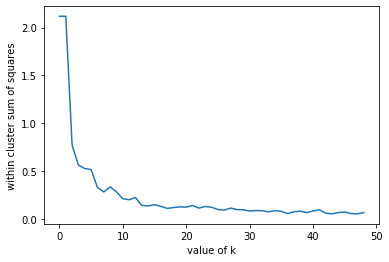

In [7]:
wcss=[]
for k in range(1,50):
    grps,centroid = KMeans(df,k)
    val = CalWCSS(grps,centroid)
    print(val)
    wcss.append(val)

plotWCSS(wcss)

116
163
81
48
111
70
29
155
123
104
0
0


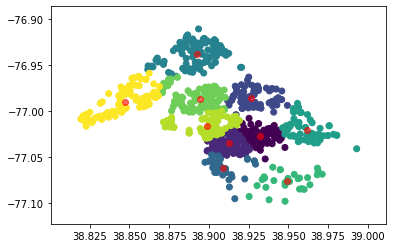

In [8]:
grps,centroid = KMeans(df,12)
x=[]
y=[]
z=[]
for key,ls in grps.items():
    print(len(ls))
    for i in range(len(ls)):
        x.append(ls[i][0])
        y.append(ls[i][1])
        z.append(key)
    
    
x=np.array(x)
y=np.array(y)
z=np.array(z)

#print(centroid)

plt.scatter(x,y,c=z)
for i in range(len(centroid)):
    xc=(centroid[i][0])
    yc=(centroid[i][1])
    plt.scatter(xc,yc,c='red',alpha=0.6)